# Analysis

### Imports

In [1]:
import logging
from IPython.utils import io
from tifffile import imread

from logger import logger
from tifmerger import *
from stackviewers import view, dualview, plot_summary
from kalman import KalmanDenoiser

logger.setLevel(logging.INFO)

### Gather data folders

In [2]:
basedir = '../../data/region1/'
datafolders = get_data_folders(basedir)

### Merge TIFs into stack

In [3]:
datafolder = datafolders[0]
with io.capture_output() as captured:  # turning off warning upon TIF reading
    stackfpath = mergetifs(datafolder)

 11/10/2021 16:53:08: Output stack file "/Users/tlemaire/Documents/data/region1/line3_100frames_100Hz_200ms_3.56Hz_08MPA_60DC-749_stack.tif" already exists
 11/10/2021 16:53:11: Image 0 ("line3_100frames_100Hz_200ms_3.56Hz_08MPA_60DC-749_Cycle00001_Ch2_000001.ome.tif") is corrupted (shape = (10, 256, 256)) -> ommitting first 9 frames
 11/10/2021 16:53:12: Generated 1600-frames image stack
 11/10/2021 16:53:13: Saved (1600, 256, 256) uint16 stack as "/Users/tlemaire/Documents/data/region1/line3_100frames_100Hz_200ms_3.56Hz_08MPA_60DC-749_stack.tif"


### Visualize stack

 11/10/2021 16:53:17: stack size: (1600, 256, 256)
 11/10/2021 16:53:17: rendering stack view...


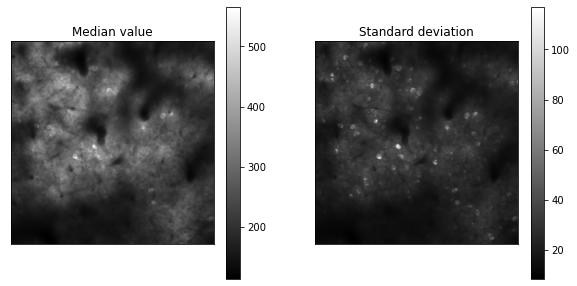

In [4]:
stack = imread(stackfpath)
fig = plot_summary(stack)
view(stack)

### Apply Kalman filter to denoise stack

 11/10/2021 16:53:17: filtering 1600-frames stack with KalmanDenoiser(gain=0.8, var=0.05, npad=10)


100%|██████████| 1609/1609 [00:01<00:00, 1226.30it/s]


 11/10/2021 16:53:25: stack size: (1600, 256, 256)
 11/10/2021 16:53:25: rendering stacks view...


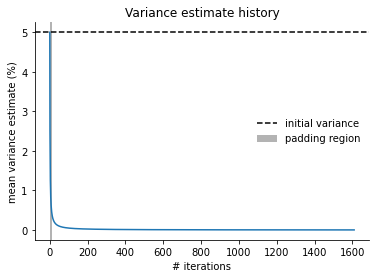

In [5]:
gain = 0.8
variance = 0.05
npad = 10
kd = KalmanDenoiser(gain=gain, variance=variance, npad=npad)
filtered_stack, ex_history = kd.filter(stack, full_output=True)
fig1 = kd.plot_variance_history(ex_history)
dualview(stack, filtered_stack, title1='Raw', title2='Filtered')